1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

[[-0.03486442]
 [-0.04152323]
 [-0.11125207]]
[[ 0.97377805  1.0253975   2.97295359]
 [ 1.0253975   9.95000525 12.00080026]
 [ 2.97295359 12.00080026 17.94670744]]
[[ 0.97377805  1.0253975   2.97295359]
 [ 1.0253975   9.95000525 12.00080026]
 [ 2.97295359 12.00080026 17.94670744]]
Are they the same? True
Determinant value should be different than 0 to use eigendecomposition.
Determinant is:  2.5762749379307427e-14
eigenvalues:  [ 2.69472544e+01+0.j -2.63371460e-16+0.j  1.92323637e+00+0.j]
eigenvectors:
  [[-0.1153048  -0.81649658  0.56571913]
 [-0.5775568  -0.40824829 -0.7069381 ]
 [-0.80816641  0.40824829  0.42450017]]
 ------------------------SVD solution--------------------------

shapes: U = (3, 3) D: (3,) V^T: (1000, 1000) 

Spectrum(D):
 [1.64116456e+02 4.38488972e+01 1.01304597e-14] 

U:
 [[-0.11540507  0.56569869 -0.81649658]
 [-0.5774315  -0.70704045 -0.40824829]
 [-0.80824163  0.42435692  0.40824829]] 

V:  [[ 0.01931673 -0.04478815 -0.77779832 ...  0.03220727  0.01017917
   

(-15.0, 15.0, -15.0, 15.0)

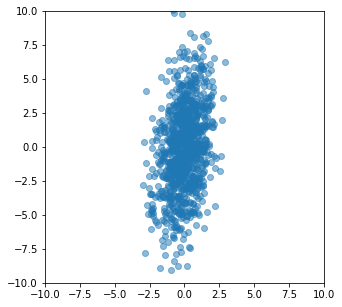

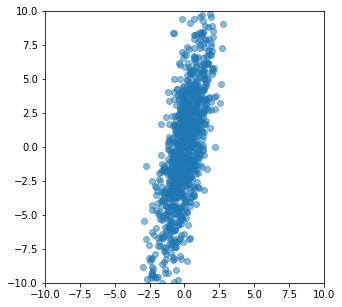

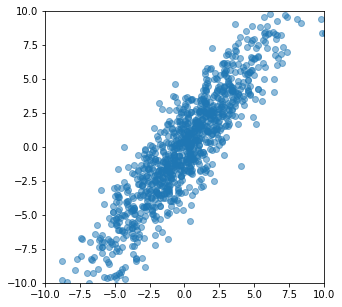

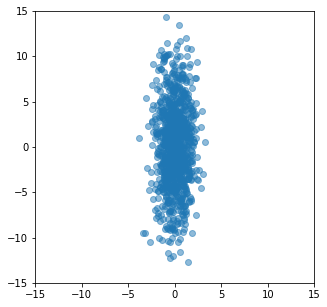

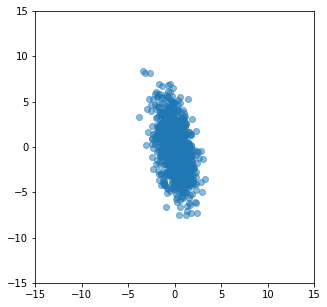

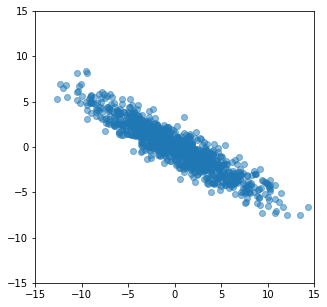

In [141]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
p=1000
# Element-wise operations
x1 = np.random.normal(0,1,p)
x2 = x1 + np.random.normal(0,3,p)
x3 = 2 * x1 + x2

my3d_dataset = x1
my3d_dataset = np.vstack([my3d_dataset,x2])
my3d_dataset = np.vstack([my3d_dataset,x3])
#print(my3d_dataset.shape)

myMean = my3d_dataset.mean(axis=1)[:, np.newaxis]
print(myMean)
myCentered = my3d_dataset - myMean
cov = myCentered.dot(myCentered.T) / (p - 1)
np_cov = np.cov(my3d_dataset)
print(cov)
print(np_cov)
print("Are they the same?", np.allclose(cov, np_cov))

print("Determinant value should be different than 0 to use eigendecomposition.\nDeterminant is: ",la.det(cov))
#eigendecomposition
l, V = la.eig(cov)
print("eigenvalues: ",l)
print("eigenvectors:\n ",V)

print(" ------------------------SVD solution--------------------------\n")
#SVD solution
U, D, Vt = la.svd(my3d_dataset)

print("shapes: U =", U.shape, "D:", D.shape, "V^T:", Vt.shape, '\n')
print("Spectrum(D):\n", D, '\n')
print("U:\n", U, '\n')
#print("V^T:\n", Vt, '\n')

sdv_V = Vt.T
print("V: ",sdv_V)
# DT.D 
Dt = D.T
print("Diagonal elements are eigenvalues of A.AT or AT.A: ",np.outer(Dt,Dt))
DtD = np.outer(Dt,Dt)
print("Eigenvalues are:",np.sqrt(DtD[0,0]),np.sqrt(DtD[1,1]),np.sqrt(DtD[2,2]))
print("Eigenvectors of At.A in the columns of: \n",U)
#print("Eigenvectors of A.At in the columns of: \n",Vt.T)


# If we examine the columns of U matrix, we can see that each column is the same with the eigenvectors obtained 
# in the first part of the question.

print("\n------------------------Variability-----------------------\n")
l = np.real_if_close(l)
Lambda = np.diag(l)
myDiag = np.diag(Lambda)
Sorted_Diag_Lambda = np.sort(myDiag)[::-1]
print("Sorteddddddddd",Sorted_Diag_Lambda)
for i in range(len(Lambda[0])):
    Lambda[i,i]=Sorted_Diag_Lambda[i]
    
print("Lambda:\n", Lambda, '\n')
print("Trace(A):\n", cov.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')
if (Lambda[0,0]/Lambda.trace()*100) < 99:
    if (Lambda[0,0]+Lambda[1,1])/Lambda.trace()*100 < 99: 
        print("By selecting the component 0,1 and 2 we retain %.2f%% of the total variability" % ((Lambda[0,0]+Lambda[1,1]+Lambda[2,2])/Lambda.trace()*100))
    else:
        print("By selecting the component 0, we retain %.2f%% of the total variability" %((Lambda[0,0])/Lambda.trace()*100))        
        print("By selecting the component 0 and 1 we retain %.2f%% of the total variability" % ((Lambda[0,0]+Lambda[1,1])/Lambda.trace()*100))
else:
    print("By selecting the component 0, we retain %.2f%% of the total variability" %((Lambda[0,0])/Lambda.trace()*100))
    
    
print("--------------------------------plots----------------------------------")
newBasis_dataset = np.dot(V, my3d_dataset)
scale_factor = 3

plt.figure(figsize=(5, 5))
plt.scatter(my3d_dataset[0,:], my3d_dataset[1,:], alpha=0.5)
plt.axis([-10, 10, -10, 10])

plt.figure(figsize=(5, 5))
plt.scatter(my3d_dataset[0,:], my3d_dataset[2,:], alpha=0.5)
plt.axis([-10, 10, -10, 10])

plt.figure(figsize=(5, 5))
plt.scatter(my3d_dataset[1,:], my3d_dataset[2,:], alpha=0.5)
plt.axis([-10, 10, -10, 10])

plt.figure(figsize=(5, 5))
plt.scatter(newBasis_dataset[0,:], newBasis_dataset[1,:], alpha=0.5)
plt.axis([-15, 15, -15, 15])

plt.figure(figsize=(5, 5))
plt.scatter(newBasis_dataset[0,:], newBasis_dataset[2,:], alpha=0.5)
plt.axis([-15, 15, -15, 15])

plt.figure(figsize=(5, 5))
plt.scatter(newBasis_dataset[1,:], newBasis_dataset[2,:], alpha=0.5)
plt.axis([-15, 15, -15, 15])


2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

Sorteddddddddd eigenvalues [2.55046962e+01+0.j 2.08070754e+00+0.j 2.93459911e-03+0.j
 2.82690220e-03+0.j 2.67247983e-03+0.j 2.54701482e-03+0.j
 2.53749714e-03+0.j 2.44927832e-03+0.j 2.31245801e-03+0.j
 2.27300213e-03+0.j 2.20193338e-03+0.j 2.17193883e-03+0.j
 2.12213102e-16+0.j]
Component 0 92%
Component 0 and 1 100%
Component 0,1 and 2 100%


(-15.0, 15.0, -15.0, 15.0)

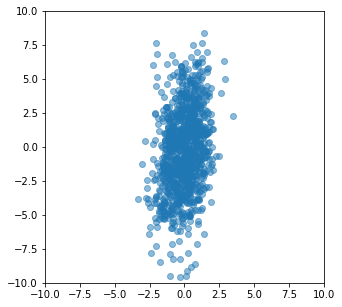

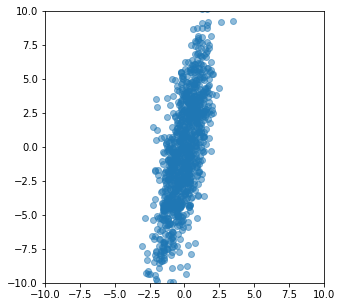

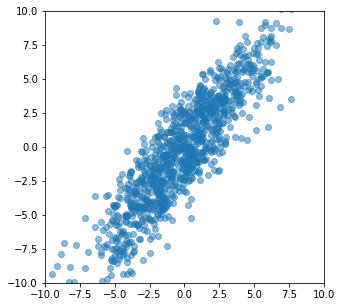

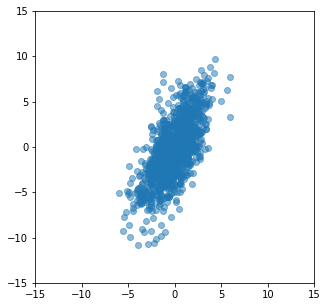

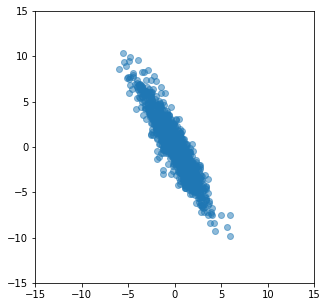

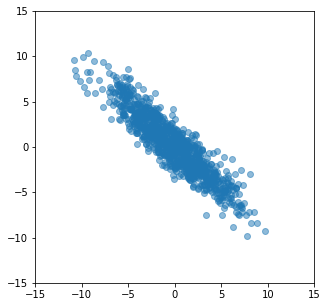

In [140]:
myNoise = np.random.normal(loc=0, scale=0.05, size=(10, p))
myData_with_noise = np.vstack((my3d_dataset,myNoise))

np_cov_n = np.cov(myData_with_noise)
l_n, V_n = la.eig(np_cov_n)
Lambda_n = np.diag(l_n)
myDiag_n = np.diag(Lambda_n)
Sorted_Diag_Lambda_n = np.sort(myDiag_n)[::-1]
print("Sorteddddddddd eigenvalues",Sorted_Diag_Lambda_n)
for i in range(len(Lambda_n[0])):
    Lambda_n[i,i]=Sorted_Diag_Lambda_n[i]

print("Component 0 %2.f%%"%((Lambda[0,0])/Lambda.trace()*100))
print("Component 0 and 1 %2.f%%" %((Lambda[0,0]+Lambda[1,1])/Lambda.trace()*100))
print("Component 0,1 and 2 %2.f%%" %((Lambda[0,0]+Lambda[1,1]+Lambda[2,2])/Lambda.trace()*100))

#print("Eigenvectors of At.A in the columns of: \n",U_n)
#print(Lambda_n)
new_basis_dataset_n = np.dot(V_n, myData_with_noise)

plt.figure(figsize=(5, 5))
plt.scatter(myData_with_noise[0,:], myData_with_noise[1,:], alpha=0.5)
plt.axis([-10, 10, -10, 10])

plt.figure(figsize=(5, 5))
plt.scatter(myData_with_noise[0,:], myData_with_noise[2,:], alpha=0.5)
plt.axis([-10, 10, -10, 10])

plt.figure(figsize=(5, 5))
plt.scatter(myData_with_noise[1,:], myData_with_noise[2,:], alpha=0.5)
plt.axis([-10, 10, -10, 10])

plt.figure(figsize=(5, 5))
plt.scatter(new_basis_dataset_n[0,:], new_basis_dataset_n[1,:], alpha=0.5)
plt.axis([-15, 15, -15, 15])

plt.figure(figsize=(5, 5))
plt.scatter(new_basis_dataset_n[0,:], new_basis_dataset_n[2,:], alpha=0.5)
plt.axis([-15, 15, -15,15])

plt.figure(figsize=(5, 5))
plt.scatter(new_basis_dataset_n[1,:], new_basis_dataset_n[2,:], alpha=0.5)
plt.axis([-15, 15, -15, 15])


# By adding noise to our data, we can retain 92% of the total variability with the component 0. Without noise,
# with 0 component, we retained nearly 93.5% of the total variability. 
# We may conclude that the loss of information increases or the number of dimensions to reach that the data 
# has nearly all its variations decreases when the uncorrelated noise is added to data.



3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [142]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 


--2022-01-20 21:20:09--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu... 128.195.10.252
Connecting to archive.ics.uci.edu|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1.4M) [application/x-httpd-php]
Saving to: 'data/magic04.data.1'

magic04.data.1      100%[===================>]   1.41M  1.31MB/s    in 1.1s    

2022-01-20 21:20:10 (1.31 MB/s) - 'data/magic04.data.1' saved [1477391/1477391]

--2022-01-20 21:20:11--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu... 128.195.10.252
Connecting to archive.ics.uci.edu|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5400 (5.3K) [application/x-httpd-php]
Saving to: 'data/magic04.names.1'

magic04.names.1     100%[===================>]   5.27K  --.-KB/s    in 0s      

2022-01-20 21:20:11 (22.7 MB/s) - 'data/magic04.names.1' saved